Research Questions:
1. 	Are participants with a higher level of “openness to experience”, “impulsivity”, and “Sensation seeking” characteristics more likely to use drugs that fall into the illegal / hard drug category?
2. 	Are participants who responded to using cannabis “Used in the last week” more likely to use drugs that are typically considered illegal / hard drugs?

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import math

In [203]:
df = pd.read_table("drug_consumption.data", sep=",")
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1885 non-null   int64  
 1   Age               1885 non-null   float64
 2   Gender            1885 non-null   float64
 3   Education         1885 non-null   float64
 4   Country           1885 non-null   float64
 5   Ethinicity        1885 non-null   float64
 6   Nscore            1885 non-null   float64
 7   Escore            1885 non-null   float64
 8   Oscore            1885 non-null   float64
 9   Ascore            1885 non-null   float64
 10  Cscore            1885 non-null   float64
 11  Impulsiveness     1885 non-null   float64
 12  SensationSeeking  1885 non-null   float64
 13  Alcohol           1885 non-null   object 
 14  Amphet            1885 non-null   object 
 15  Amyl              1885 non-null   object 
 16  Benzos            1885 non-null   object 


,ID,Age,Gender,Education,Country,Ethinicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SensationSeeking,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Chocolate,Coke,Crack,Ecstacy,Heroin,Ketamine,LegalHigh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,0.41594,0.88113,1.22470,CL4,CL3,CL0,CL3,CL6,CL3,CL6,CL3,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [204]:
df.describe()

,ID,Age,Gender,Education,Country,Ethinicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SensationSeeking
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


Start with reading all the correct columns in: in this case, we want the Oscore column as well as the general information columns each drug that falls into the hard drug catagory. Hard drugs are: Cocaine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, VSA

In [205]:
# First we must select the necesary rows for Oscore, Impulsiveness score, Sensation Seeking score, general information, and hard drugs. This can be accomplished with indexing.
oscore = df.iloc[:, [1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 21, 22, 23, 24, 25, 26, 27, 28, 31]]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None)
print(oscore)

          Age   Gender  Education   Nscore   Escore   Oscore   Ascore   Cscore  Impulsiveness  SensationSeeking Crack Ecstacy Heroin Ketamine LegalHigh  LSD Meth Mushrooms  VSA
0     0.49788  0.48246   -0.05921  0.31287 -0.57545 -0.58331 -0.91699 -0.00665       -0.21712          -1.18084   CL0     CL0    CL0      CL0       CL0  CL0  CL0       CL0  CL0
1    -0.07854 -0.48246    1.98437 -0.67825  1.93886  1.43533  0.76096 -0.14277       -0.71126          -0.21575   CL0     CL4    CL0      CL2       CL0  CL2  CL3       CL0  CL0
2     0.49788 -0.48246   -0.05921 -0.46725  0.80523 -0.84732 -1.62090 -1.01450       -1.37983           0.40148   CL0     CL0    CL0      CL0       CL0  CL0  CL0       CL1  CL0
3    -0.95197  0.48246    1.16365 -0.14882 -0.80615 -0.01928  0.59042  0.58489       -1.37983          -1.18084   CL0     CL0    CL0      CL2       CL0  CL0  CL0       CL0  CL0
4     0.49788  0.48246    1.98437  0.73545 -1.63340 -0.45174 -0.30172  1.30612       -0.21712          -0.21575   C

<AxesSubplot:>

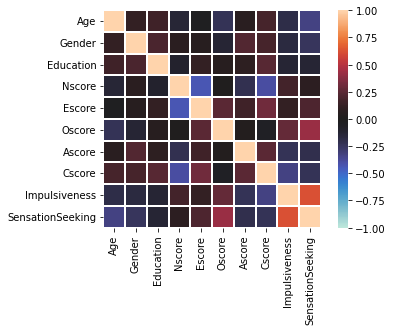

In [206]:
corr_matrix = oscore.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, square=True, linewidths=.1)

The results recorded above are sound if we are looking for a canadite who is a user in every type of hard drug recorded. A better metric would perhaps be a individual who recorded value of CL3 or greater. Therefore, 'Never used', 'Used over a decade ago', 'Used in last decade' are all part of the non-user class and 'Used in last year', 'Used in last month', 'Used in last week', and 'Used in last day' are all part of the user class. To achieve this, we must parse the data for users that have a value of CL3 or higher in any at least one column. 

In [207]:
# First, we can parse the oscore table through several times and generate seperate tabels for each drug that contains rows with CL3 or greater. These are our user tables 
oscore_Crack_user_parse = oscore.loc[oscore['Crack'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]
oscore_Ecstacy_user_parse = oscore.loc[oscore['Ecstacy'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]
oscore_Heroin_user_parse = oscore.loc[oscore['Heroin'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]
oscore_Ketamine_user_parse = oscore.loc[oscore['Ketamine'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]
oscore_LegalHigh_user_parse = oscore.loc[oscore['LegalHigh'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]
oscore_LSD_user_parse = oscore.loc[oscore['LSD'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]
oscore_Meth_user_parse = oscore.loc[oscore['Meth'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]
oscore_Mushrooms_user_parse = oscore.loc[oscore['Ecstacy'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]
oscore_VSA_user_parse = oscore.loc[oscore['VSA'].isin(['CL3', 'CL4', 'CL5', 'CL6'])]

# Next, we must combine all the tables together being careful to not duplicate records. This should leave us with a complete table of all users that have a CL3 score or greater 
# at least one hard drug column.
join_table = pd.merge(oscore_Crack_user_parse, oscore_Ecstacy_user_parse, how='outer')
join_table = pd.merge(join_table, oscore_Heroin_user_parse, how='outer')
join_table = pd.merge(join_table, oscore_Ketamine_user_parse, how='outer')
join_table = pd.merge(join_table, oscore_LegalHigh_user_parse, how='outer')
join_table = pd.merge(join_table, oscore_LSD_user_parse, how='outer')
join_table = pd.merge(join_table, oscore_Meth_user_parse, how='outer')
join_table = pd.merge(join_table, oscore_Mushrooms_user_parse, how='outer')
join_table = pd.merge(join_table, oscore_VSA_user_parse, how='outer')
join_table.drop_duplicates()
print(join_table)
print('There are '+  str(len(join_table.index)) + ' frequent hard drug users')

         Age   Gender  Education   Nscore   Escore   Oscore   Ascore   Cscore  Impulsiveness  SensationSeeking Crack Ecstacy Heroin Ketamine LegalHigh  LSD Meth Mushrooms  VSA
0   -0.95197 -0.48246   -0.61113  1.49158 -1.23177  0.72330 -2.35413 -1.92173        0.88113           0.07987   CL3     CL0    CL0      CL0       CL2  CL0  CL0       CL3  CL3
1   -0.07854 -0.48246   -2.43591  0.62967  0.00332  1.24033  1.81866  0.93949        1.86203           1.92173   CL3     CL3    CL2      CL3       CL0  CL1  CL3       CL1  CL1
2    1.09449 -0.48246   -1.73790 -1.43907  0.47617  0.29338 -0.91699  0.41594        0.52975           0.40148   CL5     CL2    CL2      CL0       CL0  CL1  CL1       CL0  CL0
3    1.82213 -0.48246   -1.73790 -0.14882 -0.30033 -0.17779  0.76096  0.41594       -0.21712          -0.21575   CL3     CL3    CL1      CL0       CL0  CL1  CL2       CL1  CL1
4    1.09449 -0.48246    0.45468  1.02119 -1.50796 -0.71727  0.28783 -0.89891       -0.21712           0.76540   CL3    

As seen above, the number of users diminished from the first trial because of the increased frequency of use level from CL1 to CL3 or greater. The results from this dataframe indicate that there are 876 users of hard drugs of any kind that recorded results in the trial. 

Now that we have properly parsed the dataset for frequent users of hard drugs, we can do some anaylsis on how general information and Oscores reflect the usage of hard drugs. Oscore is a metric that represents openess to experience where the minimum value  -3.27393 represents 24 and the maximum value 2.90161 represents 60. A low value on the Oscore chart indicates that the user has less openess to experience and a high value on the Oscore chart indicates that more openess to experience. The mean acsire value is -0.00053.

In [208]:
# Oscore Analysis - First, create two tables one that selects all rows with a Oscore value that is less than the median value of -0.00053 
# and another that selects all rows with a Oscore value that is greater than -0.00053.
oscore_analysis = join_table
oscore_analysis_less = oscore_analysis.loc[oscore_analysis['Oscore'] < -0.00053]
oscore_analysis_more = oscore_analysis.loc[oscore_analysis['Oscore'] >= -0.00053]
print('There are ' + str(len(oscore_analysis_less.index)) + ' hard drug users with an oscore less than -0.00053.')
print('There are ' + str(len(oscore_analysis_more.index)) + ' hard drug users with an oscore greater than -0.00053.')

less = len(oscore_analysis_less.index) / len(join_table.index)
more = len(oscore_analysis_more.index) / len(join_table.index)
print('Users have a ' + str(round(less * 100, 2)) + ' percent chance of having a low openess to experince score')
print('Users have a ' + str(round(more * 100, 2)) + ' percent chance of having a high openess to experince score')

There are 313 hard drug users with an oscore less than -0.00053.
There are 563 hard drug users with an oscore greater than -0.00053.
Users have a 35.73 percent chance of having a low openess to experince score
Users have a 64.27 percent chance of having a high openess to experince score


Selected below is the Impusiveness score along with a number of illegal 'hard' drugs.Impulsive (Real) is impulsiveness measured by BIS-11. Similar to the Oscore analysis done above, we can perform some metrics on the individuals with high, low and average impulsiveness scores. The mean impulsiveness score is 0.00721. Anything greater than or equal to this value represents a high impulsiveness score and anything lower represents a low impulsiveness score. 

In [209]:
# Impulsiveness Analysis - First, create two tables one that selects all rows with a Impulsiveness value that is less than the median value of 0.00721
# and another that selects all rows with a Impulsiveness value that is greater than 0.00721
Impulsiveness_analysis = join_table
Impulsiveness_analysis_less = Impulsiveness_analysis.loc[Impulsiveness_analysis['Impulsiveness'] < 0.00721]
Impulsiveness_analysis_more = Impulsiveness_analysis.loc[Impulsiveness_analysis['Impulsiveness'] >= 0.00721]
print('There are ' + str(len(Impulsiveness_analysis_less.index)) + ' hard drug users with an Impulsiveness score less than 0.00721.')
print('There are ' + str(len(Impulsiveness_analysis_more.index)) + ' hard drug users with an Impulsiveness score greater than 0.00721.')

less = len(Impulsiveness_analysis_less.index) / len(join_table.index)
more = len(Impulsiveness_analysis_more.index) / len(join_table.index)
print('Users have a ' + str(round(less * 100, 2)) + ' percent chance of having a low Impulsiveness score')
print('Users have a ' + str(round(more * 100, 2)) + ' percent chance of having a high Impulsiveness score')

There are 309 hard drug users with an Impulsiveness score less than 0.00721.
There are 567 hard drug users with an Impulsiveness score greater than 0.00721.
Users have a 35.27 percent chance of having a low Impulsiveness score
Users have a 64.73 percent chance of having a high Impulsiveness score


Selected below is the sensation seeking score along with a number of illegal 'hard' drugs. SS (Real) is sensation seeking measured by ImpSS. Similar to the Oscore analysis done above, we can perform some metrics on the individuals with high, low and average sensation seeking scores. The lowest score for sensation seeking is -2.07848 while the highest score is 1.92173. The mean SS score is -0.00329. Anything greater than or equal to this value represents a high Sensation seeking score and anything lower represents a low Sensation seeking score. 

In [210]:
# sensation_seeking Analysis - First, create two tables one that selects all rows with a sensation_seeking value that is less than the median value of -0.00329 
# and another that selects all rows with a sensation_seeking value that is greater than -0.00329.
sensation_seeking_analysis = join_table
sensation_seeking_analysis_less = sensation_seeking_analysis.loc[sensation_seeking_analysis['SensationSeeking'] < -0.00329]
sensation_seeking_analysis_more = sensation_seeking_analysis.loc[sensation_seeking_analysis['SensationSeeking'] >= -0.00329]
print('There are ' + str(len(sensation_seeking_analysis_less.index)) + ' hard drug users with an sensation seeking score less than -0.00329.')
print('There are ' + str(len(sensation_seeking_analysis_more.index)) + ' hard drug users with an sensation seeking score greater than -0.00329.')

less = len(sensation_seeking_analysis_less.index) / len(join_table.index)
more = len(sensation_seeking_analysis_more.index) / len(join_table.index)
print('Users have a ' + str(round(less * 100, 2)) + ' percent chance of having a low sensation seeking score')
print('Users have a ' + str(round(more * 100, 2)) + ' percent chance of having a high sensation seeking score')

There are 212 hard drug users with an sensation seeking score less than -0.00329.
There are 664 hard drug users with an sensation seeking score greater than -0.00329.
Users have a 24.2 percent chance of having a low sensation seeking score
Users have a 75.8 percent chance of having a high sensation seeking score


Ascore (Real) is NEO-FFI-R Agreeableness.  Similar to the Oscore analysis done above, we can perform some metrics on the individuals with high, low and average agreeableness scores. The lowest score for agreeableness is -3.46436 while the highest score is 3.46436. The mean ascore is -0.00024 Anything greater than or equal to this value represents a high agreeableness score and anything lower represents a low agreeableness score. 

In [211]:
# Agreeableness Analysis - First, create two tables one that selects all rows with a agreeableness value that is less than the median value of -0.00024 
# and another that selects all rows with a agreeableness value that is greater than -0.00024.
agreeableness_analysis = join_table
agreeableness_analysis_less = agreeableness_analysis.loc[agreeableness_analysis['Ascore'] < -0.00024]
agreeableness_analysis_more = agreeableness_analysis.loc[agreeableness_analysis['Ascore'] >= -0.00024]
print('There are ' + str(len(agreeableness_analysis_less.index)) + ' hard drug users with an agreeableness score less than -0.00024.')
print('There are ' + str(len(agreeableness_analysis_more.index)) + ' hard drug users with an agreeableness score greater than -0.00024.')

less = len(agreeableness_analysis_less.index) / len(join_table.index)
more = len(agreeableness_analysis_more.index) / len(join_table.index)
print('Users have a ' + str(round(less * 100, 2)) + ' percent chance of having a low agreeableness score')
print('Users have a ' + str(round(more * 100, 2)) + ' percent chance of having a high agreeableness score')

There are 516 hard drug users with an agreeableness score less than -0.00024.
There are 360 hard drug users with an agreeableness score greater than -0.00024.
Users have a 58.9 percent chance of having a low agreeableness score
Users have a 41.1 percent chance of having a high agreeableness score


Cscore (Real) is NEO-FFI-R Conscientiousness.  Similar to the Oscore analysis done above, we can perform some metrics on the individuals with high, low and average conscientiousness scores. The lowest score for conscientiousness is -3.46436 while the highest score is 3.46436. The mean score is -0.00039 Anything greater than or equal to this value represents a high conscientiousness score and anything lower represents a low conscientiousness score. 

In [212]:
# Cscore Analysis - First, create two tables one that selects all rows with a Cscore value that is less than the median value of -0.00039
# and another that selects all rows with a Cscore value that is greater than -0.00039.
Cscore_analysis = join_table
Cscore_analysis_less = Cscore_analysis.loc[Cscore_analysis['Cscore'] < -0.00039]
Cscore_analysis_more = Cscore_analysis.loc[Cscore_analysis['Cscore'] >= -0.00039]
print('There are ' + str(len(Cscore_analysis_less.index)) + ' hard drug users with an Cscore score less than -0.00039.')
print('There are ' + str(len(Cscore_analysis_more.index)) + ' hard drug users with an Cscore score greater than -0.00039.')

less = len(Cscore_analysis_less.index) / len(join_table.index)
more = len(Cscore_analysis_more.index) / len(join_table.index)
print('Users have a ' + str(round(less * 100, 2)) + ' percent chance of having a low Cscore score')
print('Users have a ' + str(round(more * 100, 2)) + ' percent chance of having a high Cscore score')

There are 583 hard drug users with an Cscore score less than -0.00039.
There are 293 hard drug users with an Cscore score greater than -0.00039.
Users have a 66.55 percent chance of having a low Cscore score
Users have a 33.45 percent chance of having a high Cscore score


Nscore (Real) is NEO-FFI-R Neuroticism.  Similar to the Oscore analysis done above, we can perform some metrics on the individuals with high, low and average Neuroticism scores. The lowest score for Neuroticism is -3.46436 while the highest score is 3.27393. The mean score is 0.00004. Anything greater than or equal to this value represents a high Neuroticism score and anything lower represents a low Neuroticism score. 

In [213]:
# Nscore Analysis - First, create two tables one that selects all rows with a Nscore value that is less than the median value of 0.00004
# and another that selects all rows with a Nscore value that is greater than 0.00004.
Nscore_analysis = join_table
Nscore_analysis_less = Nscore_analysis.loc[Nscore_analysis['Nscore'] < 0.00004]
Nscore_analysis_more = Nscore_analysis.loc[Nscore_analysis['Nscore'] >= 0.00004]
print('There are ' + str(len(Nscore_analysis_less.index)) + ' hard drug users with an Nscore score less than 0.00004.')
print('There are ' + str(len(Nscore_analysis_more.index)) + ' hard drug users with an Nscore score greater than 0.00004.')

less = len(Nscore_analysis_less.index) / len(join_table.index)
more = len(Nscore_analysis_more.index) / len(join_table.index)
print('Users have a ' + str(round(less * 100, 2)) + ' percent chance of having a low Nscore score')
print('Users have a ' + str(round(more * 100, 2)) + ' percent chance of having a high Nscore score')

There are 378 hard drug users with an Nscore score less than 0.00004.
There are 498 hard drug users with an Nscore score greater than 0.00004.
Users have a 43.15 percent chance of having a low Nscore score
Users have a 56.85 percent chance of having a high Nscore score


Escore (Real) is NEO-FFI-R Extraversion. Similar to the Oscore analysis done above, we can perform some metrics on the individuals with high, low and average Extraversion scores. The lowest score for Extraversion is -3.27393 while the highest score is 3.27393. The mean score is -0.00016. Anything greater than or equal to this value represents a high Extraversion score and anything lower represents a low Extraversion score. 

In [214]:
# Escore Analysis - First, create two tables one that selects all rows with a Escore value that is less than the median value of -0.00016
# and another that selects all rows with a Escore value that is greater than -0.00016.
Escore_analysis = join_table
Escore_analysis_less = Escore_analysis.loc[Escore_analysis['Escore'] < -0.00016]
Escore_analysis_more = Escore_analysis.loc[Escore_analysis['Escore'] >= -0.00016]
print('There are ' + str(len(Escore_analysis_less.index)) + ' hard drug users with an Escore score less than -0.00016.')
print('There are ' + str(len(Escore_analysis_more.index)) + ' hard drug users with an Escore score greater than -0.00016.')

less = len(Escore_analysis_less.index) / len(join_table.index)
more = len(Escore_analysis_more.index) / len(join_table.index)
print('Users have a ' + str(round(less * 100, 2)) + ' percent chance of having a low Escore score')
print('Users have a ' + str(round(more * 100, 2)) + ' percent chance of having a high Escore score')

There are 417 hard drug users with an Escore score less than -0.00016.
There are 459 hard drug users with an Escore score greater than -0.00016.
Users have a 47.6 percent chance of having a low Escore score
Users have a 52.4 percent chance of having a high Escore score


Now that some basic metrics have been provided between personality traits and the hard drug users, an ANN can be created and use supervised learning in order to train. The ANN will use the personality traits and hard drug users in order to train a model that will be able to read in a new set of personality scores and predict whether the invdividual is a user of hard drugs. 

In [215]:
#First, generate a feature matrix X. This will contain the independent variables.
X = join_table.iloc[:, 3:10].values
print('Feature matrix X (Independent Varaibles):  ')
print(X)

#Next, generate a feature matrix Y. This will contain the dependent variables.
Y = join_table.iloc[:,10:19].values
print('Feature matrix Y (Dependent Varaibles):  ')
print(Y)

#Encoding Categorical Variable hard drug user
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
#Since we have already used columns 0 - 11 previously and do not need to encode the data, we will start the process of encoding at column 12 until the last column.
#Use label encoding to transform the Crack Column
Y[:,0] = np.array(LE1.fit_transform(Y[:,0]))

#Use label encoding to transform the Ecstacy Column
Y[:,1] = np.array(LE1.fit_transform(Y[:,1]))

#Use label encoding to transform the Heroin Column
Y[:,2] = np.array(LE1.fit_transform(Y[:,2]))

#Use label encoding to transform the Ketamine Column
Y[:,3] = np.array(LE1.fit_transform(Y[:,3]))

#Use label encoding to transform the LegalHigh Column
Y[:,4] = np.array(LE1.fit_transform(Y[:,4]))

#Use label encoding to transform the LSD Column
Y[:,5] = np.array(LE1.fit_transform(Y[:,5]))

#Use label encoding to transform the Meth Column
Y[:,6] = np.array(LE1.fit_transform(Y[:,6]))

#Use label encoding to transform the Mushrooms Column
Y[:,7] = np.array(LE1.fit_transform(Y[:,7]))

#Use label encoding to transform the VSA Column
Y[:,8] = np.array(LE1.fit_transform(Y[:,8]))

print('Feature matrix Y (Dependent Varaibles) after using Label encoding:  ')
print(Y)

#Convert users >= 3 to a binary value of 1 and non users < 3 to a binary value of 0
Y = (Y >= 3).astype(int)

print('Feature matrix Y (Dependent Varaibles) after converting the label encoded value to a binary result of 0s and 1s :  ')
print(Y)


Feature matrix X (Independent Varaibles):  
[[ 1.49158 -1.23177  0.7233  ... -1.92173  0.88113  0.07987]
 [ 0.62967  0.00332  1.24033 ...  0.93949  1.86203  1.92173]
 [-1.43907  0.47617  0.29338 ...  0.41594  0.52975  0.40148]
 ...
 [ 0.91093  0.00332  0.88309 ... -0.52745 -1.37983  0.07987]
 [ 0.04257  0.00332 -0.17779 ...  1.81175  0.88113  0.40148]
 [ 1.98437 -1.7625   0.14143 ... -0.89891  0.19268 -0.52593]]
Feature matrix Y (Dependent Varaibles):  
[['CL3' 'CL0' 'CL0' ... 'CL0' 'CL3' 'CL3']
 ['CL3' 'CL3' 'CL2' ... 'CL3' 'CL1' 'CL1']
 ['CL5' 'CL2' 'CL2' ... 'CL1' 'CL0' 'CL0']
 ...
 ['CL0' 'CL0' 'CL0' ... 'CL0' 'CL2' 'CL3']
 ['CL0' 'CL0' 'CL0' ... 'CL0' 'CL0' 'CL6']
 ['CL0' 'CL0' 'CL0' ... 'CL0' 'CL0' 'CL3']]
Feature matrix Y (Dependent Varaibles) after using Label encoding:  
[[3 0 0 ... 0 3 3]
 [3 3 2 ... 3 1 1]
 [5 2 2 ... 1 0 0]
 ...
 [0 0 0 ... 0 2 3]
 [0 0 0 ... 0 0 6]
 [0 0 0 ... 0 0 3]]
Feature matrix Y (Dependent Varaibles) after converting the label encoded value to a bina

Now that the data has been seperated into feature matrices and the necesary data has been encoded, the next step is to seperate the data set into training and testing portions. The training portion will be 80% and the testing portion will be the remaining 20%. This is standard of most machine learning algorithms and should produce a high level of accuracy.

In [216]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print('The number of rows in the training dataset is ' + str(len(X_train)))
print('The number of rows in the testing dataset is ' + str(len(X_test)))

The number of rows in the training dataset is 700
The number of rows in the testing dataset is 176


Finally, the last step before feeding the data to our ANN model is to perform feature scaling. This will ensure that the variables that have higher values in the data set do not dominate the variables that have lower values as they will all be scaled accordingly. To accompish this standardization will be used on the training and test sets. This will convert each value within the range of (-3)->(3)

In [217]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('X_Train df: ')
print(len(X_train))

print('X_Test df: ')
print(len(X_test))

print('Y_Train df: ')
print(len(Y_train))

print('Y_Test df: ')
print(len(Y_test))


X_Train df: 
700
X_Test df: 
176
Y_Train df: 
700
Y_Test df: 
176


In [218]:
#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=9,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.7194 - accuracy: 0.0871 
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.1257
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.1757
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.1800
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.2143
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.2371
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.2457
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.2586
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.2543
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.2700
Epoch 11

As seen above, this produces results that are very low in terms of accuracy. This may be a result of the algorithm having too many output features to look through as it is trying to classify if the individual is a user of any drug, not a user of a specific drug. To fix this, lets run the same analysis with each drug seperately.

In [219]:
#Run the expirenment again with each drug being the only output
#First, generate a feature matrix X. This will contain the independent variables.
X = oscore.iloc[:, [5, 7, 8, 9]].values
print('Feature matrix X (Independent Varaibles):  ')
print(X)

Y = oscore.iloc[:,10:19].values
print('Feature matrix Y (Dependent Varaibles):  ')
print(Y)

#Since we have already used columns 0 - 11 previously and do not need to encode the data, we will start the process of encoding at column 12 until the last column.
#Use label encoding to transform the Crack Column
Y[:,0] = np.array(LE1.fit_transform(Y[:,0]))

#Use label encoding to transform the Ecstacy Column
Y[:,1] = np.array(LE1.fit_transform(Y[:,1]))

#Use label encoding to transform the Heroin Column
Y[:,2] = np.array(LE1.fit_transform(Y[:,2]))

#Use label encoding to transform the Ketamine Column
Y[:,3] = np.array(LE1.fit_transform(Y[:,3]))

#Use label encoding to transform the LegalHigh Column
Y[:,4] = np.array(LE1.fit_transform(Y[:,4]))

#Use label encoding to transform the LSD Column
Y[:,5] = np.array(LE1.fit_transform(Y[:,5]))

#Use label encoding to transform the Meth Column
Y[:,6] = np.array(LE1.fit_transform(Y[:,6]))

#Use label encoding to transform the Mushrooms Column
Y[:,7] = np.array(LE1.fit_transform(Y[:,7]))

#Use label encoding to transform the VSA Column
Y[:,8] = np.array(LE1.fit_transform(Y[:,8]))
print('Feature matrix Y (Dependent Varaibles) after using Label encoding:  ')
print(Y)

#Convert users >= 3 to a binary value of 1 and non users < 3 to a binary value of 0
Y = (Y >= 3).astype(int)
print('Feature matrix Y (Dependent Varaibles) after converting the label encoded value to a binary result of 0s and 1s :  ')
print(Y)

# Grab the first column of every row for Crack
index = 0
maxIndex = 8
while index <= maxIndex:
    if index == 0:
        print("Crack data: ")
    if index == 1:
        print("Ecstacy data: ")
    if index == 2:
        print("Heroin data: ")
    if index == 3:
        print("Ketamine data: ")
    if index == 4:
        print("LegalHigh data: ")
    if index == 5:
        print("LSD data: ")
    if index == 6:
        print("Meth data: ")
    if index == 7:
        print("Mushroom data: ")
    if index == 8:
        print("VSA data: ")

    drug_data = [i[index] for i in Y]
    print('Feature matrix Y (Dependent Varaibles):  ')
    print(drug_data)

    X_train,X_test,Y_train,Y_test = train_test_split(X,drug_data,test_size=0.2,random_state=0)
    print('The number of rows in the training dataset is ' + str(len(X_train)))
    print('The number of rows in the testing dataset is ' + str(len(X_test)))

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #Initialising ANN
    ann = tf.keras.models.Sequential()

    #Adding First Hidden Layer
    ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

    #Adding Second Hidden Layer
    ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

    #Adding Output Layer
    ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

    #Compiling ANN
    ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

    #Fitting ANN
    X_train = np.asarray(X_train).astype('float32')
    Y_train = np.asarray(Y_train).astype('float32')
    ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

    # Increment to next drug
    index = index + 1


Feature matrix X (Independent Varaibles):  
[[-0.58331 -0.00665 -0.21712 -1.18084]
 [ 1.43533 -0.14277 -0.71126 -0.21575]
 [-0.84732 -1.0145  -1.37983  0.40148]
 ...
 [-1.27553 -1.38502  0.52975 -0.52593]
 [ 0.29338 -2.57309  1.29221  1.2247 ]
 [ 1.65653  0.41594  0.88113  1.2247 ]]
Feature matrix Y (Dependent Varaibles):  
[['CL0' 'CL0' 'CL0' ... 'CL0' 'CL0' 'CL0']
 ['CL0' 'CL4' 'CL0' ... 'CL3' 'CL0' 'CL0']
 ['CL0' 'CL0' 'CL0' ... 'CL0' 'CL1' 'CL0']
 ...
 ['CL0' 'CL4' 'CL0' ... 'CL0' 'CL2' 'CL0']
 ['CL0' 'CL3' 'CL0' ... 'CL0' 'CL3' 'CL0']
 ['CL0' 'CL3' 'CL0' ... 'CL0' 'CL3' 'CL2']]
Feature matrix Y (Dependent Varaibles) after using Label encoding:  
[[0 0 0 ... 0 0 0]
 [0 4 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 4 0 ... 0 2 0]
 [0 3 0 ... 0 3 0]
 [0 3 0 ... 0 3 2]]
Feature matrix Y (Dependent Varaibles) after converting the label encoded value to a binary result of 0s and 1s :  
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 [0 1

For the second research question: "Are participants who responded to using cannabis “Used in the last month” more likely to use drugs that are typically considered illegal / hard drugs?" two output columns are being measured and therefore users that recorded a score of CL5 or higher will be considered users and CL4 or lower are considered nonusers. The first step to solving this question is to split the dataframe into users and nonusers accroding to their recorded usage value of cannabis.

In [ ]:
#Select the cannabis column as well as other hard drug columns
cannabis_table = df.iloc[:, [18, 21, 22, 23, 24, 25, 26, 27, 28, 31]]
# print(cannabis_table)

cannabis_user_parse = cannabis_table.loc[cannabis_table['Cannabis'].isin(['CL5', 'CL6'])]
cannabis_nonuser_parse = cannabis_table.loc[cannabis_table['Cannabis'].isin(['CL0', 'CL1', 'CL2', 'CL3', 'CL4'])]
print('There are ' + str(len(cannabis_user_parse.index)) + ' cannabis users')
print('There are ' + str(len(cannabis_nonuser_parse.index)) + ' cannabis nonusers')



There are 648 cannabis users
There are 1237 cannabis nonusers


Now that the tables are set up and ready to go, lets use the same method as before to encode our labels and turn them into binary values

In [ ]:
cannabis_table = df.iloc[:, [18, 21, 22, 23, 24, 25, 26, 27, 28, 31]].values

#Use label encoding to transform the cannabis Column
cannabis_table[:,0] = np.array(LE1.fit_transform(cannabis_table[:,0]))

#Use label encoding to transform the Ecstacy Column
cannabis_table[:,1] = np.array(LE1.fit_transform(cannabis_table[:,1]))

#Use label encoding to transform the Heroin Column
cannabis_table[:,2] = np.array(LE1.fit_transform(cannabis_table[:,2]))

#Use label encoding to transform the Ketamine Column
cannabis_table[:,3] = np.array(LE1.fit_transform(cannabis_table[:,3]))

#Use label encoding to transform the LegalHigh Column
cannabis_table[:,4] = np.array(LE1.fit_transform(cannabis_table[:,4]))

#Use label encoding to transform the LSD Column
cannabis_table[:,5] = np.array(LE1.fit_transform(cannabis_table[:,5]))

#Use label encoding to transform the Meth Column
cannabis_table[:,6] = np.array(LE1.fit_transform(cannabis_table[:,6]))

#Use label encoding to transform the Mushrooms Column
cannabis_table[:,7] = np.array(LE1.fit_transform(cannabis_table[:,7]))

#Use label encoding to transform the VSA Column
cannabis_table[:,8] = np.array(LE1.fit_transform(cannabis_table[:,8]))

#Use label encoding to transform the VSA Column
cannabis_table[:,9] = np.array(LE1.fit_transform(cannabis_table[:,9]))

#First, generate a feature matrix X. This will contain the independent variables.
X = cannabis_table[:, 0]
print('Feature matrix X (Independent Varaibles):  ')
print(X)

#Next, generate a feature matrix Y. This will contain the dependent variables.
Y = cannabis_table[:,1:9]
print('Feature matrix Y (Dependent Varaibles):  ')
print(Y)

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_Y = NormalizeData(Y)
print(scaled_Y)

Feature matrix X (Independent Varaibles):  
[0 4 3 ... 6 6 3]
Feature matrix Y (Dependent Varaibles):  
[[0 0 0 ... 0 0 0]
 [0 4 0 ... 2 3 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 4 0 ... 2 0 2]
 [0 3 0 ... 3 0 3]
 [0 3 0 ... 3 0 3]]
[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.6666666666666666 0.0 ... 0.3333333333333333 0.5 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.16666666666666666]
 ...
 [0.0 0.6666666666666666 0.0 ... 0.3333333333333333 0.0
  0.3333333333333333]
 [0.0 0.5 0.0 ... 0.5 0.0 0.5]
 [0.0 0.5 0.0 ... 0.5 0.0 0.5]]


The number of rows in the training dataset is 1508
The number of rows in the testing dataset is 377
Coefficients:  [0.06639167]
Intercept:  0.024127326247891406
Mean squared error:  0.04197997379258465
Variance:  0.3518196985189824


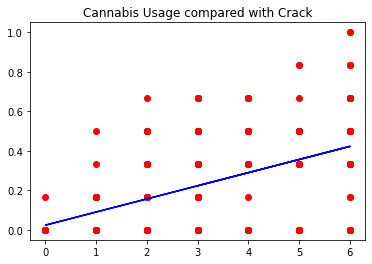

The number of rows in the training dataset is 1508
The number of rows in the testing dataset is 377
Coefficients:  [0.01856573]
Intercept:  0.00910460148330322
Mean squared error:  0.0211059962203104
Variance:  0.03326647218933376


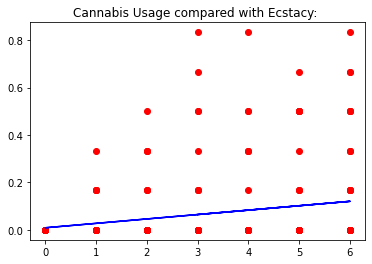

The number of rows in the training dataset is 1508
The number of rows in the testing dataset is 377
Coefficients:  [0.02763717]
Intercept:  0.014018240621248679
Mean squared error:  0.032127193601738845
Variance:  0.10321972035975513


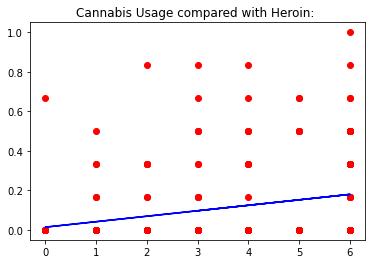

The number of rows in the training dataset is 1508
The number of rows in the testing dataset is 377
Coefficients:  [0.07227962]
Intercept:  0.010680132609924592
Mean squared error:  0.05749280840529133
Variance:  0.32378079000583093


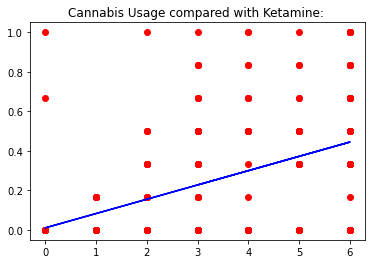

The number of rows in the training dataset is 1508
The number of rows in the testing dataset is 377
Coefficients:  [0.05703223]
Intercept:  0.010135323833525889
Mean squared error:  0.04030439038797426
Variance:  0.2768918361363085


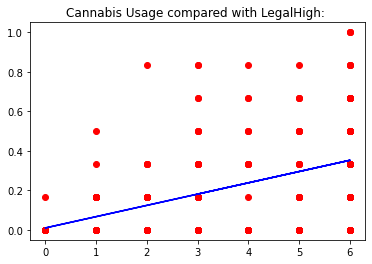

The number of rows in the training dataset is 1508
The number of rows in the testing dataset is 377
Coefficients:  [0.03599995]
Intercept:  0.030684513151760393
Mean squared error:  0.06549683291516169
Variance:  0.08021414257070236


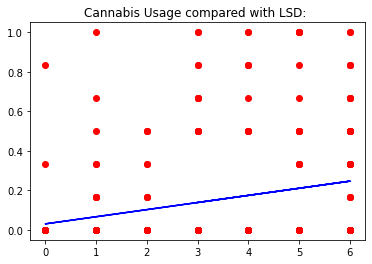

In [ ]:
index = 1
while index < maxIndex - 1: 
    Y = [i[index] for i in scaled_Y]
    #Train and Test data split
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
    print('The number of rows in the training dataset is ' + str(len(X_train)))
    print('The number of rows in the testing dataset is ' + str(len(X_test)))

    # Reshape the array from 1D to 2D so that it can be read properly by linearRegression model
    X_test = X_test.reshape(-1, 1)
    X_train = X_train.reshape(-1, 1)

    # Linear Regression setup
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    lin_reg = linear_model.LinearRegression()

    # Fit the model
    lin_reg.fit(X_train, Y_train)

    #Make a prediction
    lin_reg_prediction = lin_reg.predict(X_test)

    print("Coefficients: ", lin_reg.coef_)
    print("Intercept: ", lin_reg.intercept_)
    print("Mean squared error: ", mean_squared_error(Y_test, lin_reg_prediction))
    print("Variance: ", r2_score(Y_test, lin_reg_prediction))

    # Plotting the graph 
    import matplotlib.pyplot as plt
    plt.scatter(X_test, Y_test, color = 'red')
    plt.plot(X_test, lin_reg_prediction, color = 'blue')
    if index == 1:
        drug = "Crack"
    if index == 2:
        drug = "Ecstacy: "
    if index == 3:
        drug = "Heroin: "
    if index == 4:
        drug = "Ketamine: "
    if index == 5:
        drug = "LegalHigh: "
    if index == 6:
        drug = "LSD: "
    if index == 7:
        drug = "Meth: "
    if index == 8:
        drug = "Mushroom: "
    if index == 9:
        drug = "VSA: "

    plt.title('Cannabis Usage compared with ' + drug)
    plt.show()
    index = index + 1
